# Part 1: Non-Jupyter Notebook Animation 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

## Sine line

CPU times: user 9.04 s, sys: 169 ms, total: 9.21 s
Wall time: 23.8 s


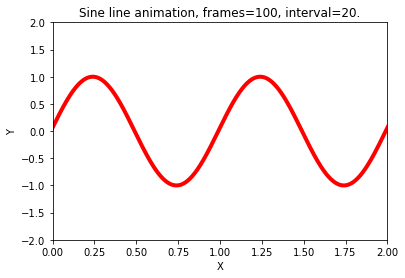

In [14]:
%%time
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([],[], lw=4, color='red')

frames = 100
interval = 20

def init():
    line.set_data([],[])
    return line,

def animate(i):
    x = np.linspace(0, 5, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

plt.title(f'Sine line animation, frames={frames}, interval={interval}.')
plt.xlabel('X')
plt.ylabel('Y')
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=frames, interval=interval,
                     blit=True)
#anim.save('sine_wave.gif', writer='imagemagick')

## Spiral line

CPU times: user 3.85 s, sys: 240 ms, total: 4.09 s
Wall time: 1min 41s


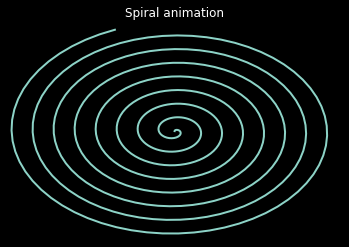

In [15]:
%%time
plt.style.use('dark_background')

fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

xdata, ydata = [], []

def animate(i):
    t = 0.1 * i
    
    x = t * np.sin(t)
    y = t * np.cos(t)
    
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

plt.title('Spiral animation')
plt.axis('off')

anim = FuncAnimation(fig, animate, init_func=init,
                    frames=500, interval=20, blit=True)

#anim.save('coil.gif', writer='imagemagick')


## Stock prices graph

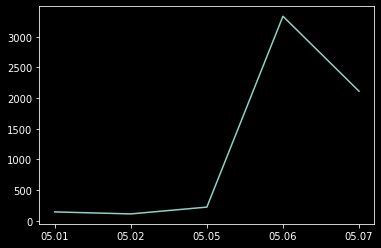

In [26]:
from time import sleep
plt.style.use('dark_background')

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

def animate(i):
    data = open('stock.txt', 'r').read()
    lines = [i for i in data.split('\n') if len(i) != 0]
    xs = []
    ys = []
    
    for line in lines:
        x, y = line.split(',')
        xs.append(x)
        ys.append(float(y))
        
    ax1.clear()
    ax1.plot(xs, ys)
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock price')
    
# Not actually working. Using of simple *.py file recomended.
ani = FuncAnimation(fig, animate, interval=1000)
plt.show()

## 3D Graphs animation

/home/biowar1337/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


CPU times: user 2min 18s, sys: 3 s, total: 2min 21s
Wall time: 2min 13s


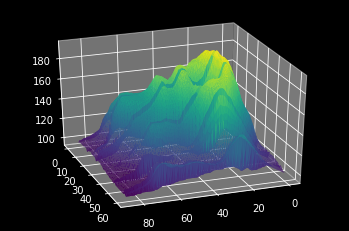

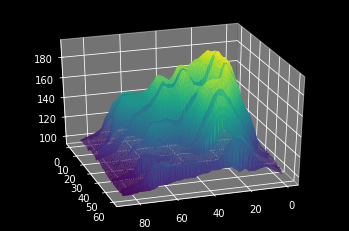

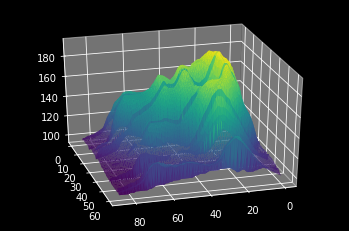

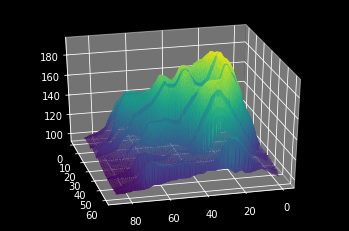

Error in callback <function flush_figures at 0x7f879508b8c8> (for post_execute):


KeyboardInterrupt: 

In [28]:
%%time
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#!mkdir frames
url = 'https://python-scripts.com/wp-content/uploads/2019/3d-data.csv'
data = pd.read_csv(url)

df = data.unstack().reset_index()
df.columns=["X", "Y", "Z"]

df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

for angle in range(70, 210, 2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    
    ax.view_init(30, angle)
    filename = 'frames/step' + str(angle) + '.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

# Bash command for gif making: 
# convert -delay 10 step*.png animated_3d.gif

## Celluloid module and animation with it

CPU times: user 713 ms, sys: 40.3 ms, total: 753 ms
Wall time: 1.98 s


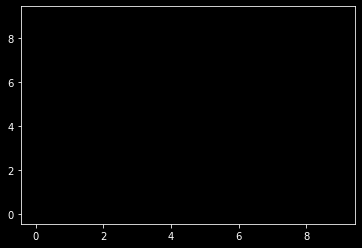

In [35]:
%%time
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

for i in range(10):
    plt.plot([i] * 10)
    camera.snap()

animation = camera.animate()
animation.save('celluloid_minimal.gif', writer='imagemagick')

## Subgraphics

CPU times: user 18.6 s, sys: 475 ms, total: 19.1 s
Wall time: 41.6 s


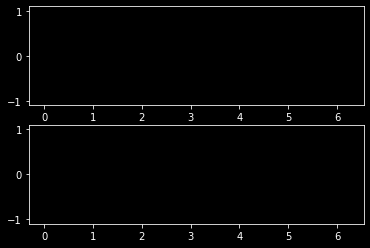

In [37]:
%%time
fig, axes = plt.subplots(2)
camera = Camera(fig)

t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue', lw=4)
    axes[1].plot(t, np.sin(t - i), color='blue', lw=4)
    camera.snap()
    
animation = camera.animate()
animation.save('celluloid_subplots.gif', writer='imagemagick')

# Embedding Matplotlib Animations in Jupyter Notebooks
<br>
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

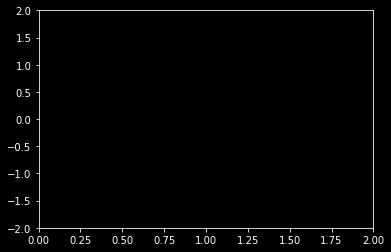

In [39]:
fig, ax = plt.subplots()

ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))
line, = ax.plot([], [], lw=2)

In [40]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [42]:
%%time
anim = FuncAnimation(fig,
                     animate,
                     init_func=init,
                     frames=100,
                     interval=20,
                     blit=True)
HTML(anim.to_html5_video())

CPU times: user 9.07 s, sys: 152 ms, total: 9.22 s
Wall time: 9.97 s


In [43]:
rc('animation', html='html5')

In [44]:
anim